In [142]:
from sonoma_dates import epochNums, epochDates, epochDays
import pandas as pd

In [143]:
epochNums = [int(x) for x in epochNums[1:-2].split(' ')]
epochDays = [float(x) for x in epochDays[1:-2].split(' ')]

In [144]:
from datetime import datetime 

date_start = "Tue Apr 27 17:10:00 2004"
date_end  = "Fri Jun 11 20:25:00 2004"


def conv_date_from_str(eg_date):
    date_vars = eg_date.split(' ')
    date_vars = [x for x in date_vars if x!=""]

    month_conv = {'Apr':4,
                  'May':5,
                  'Jun':6}

    dow = date_vars[0]
    month = month_conv[date_vars[1]]
    day = date_vars[2]
    time = date_vars[3]
    year = date_vars[4]

    hour = time.split(":")[0]
    minutes = time.split(":")[1]
    seconds = time.split(":")[2]


    # datetime(year, month, day, hour, minute, second, microsecond)
    out_datetime= datetime(int(year), month, int(day), int(hour), int(minutes), int(seconds))
    
    return out_datetime

for dd in epochDates.split('\' \'')[1:-1]:
    conv_date_from_str(dd)
date_middle = [conv_date_from_str(dd) for dd in epochDates.split('\' \'')[1:-1]]

epoch_datetimes = [conv_date_from_str(date_start)] + date_middle + [conv_date_from_str(date_end)]

In [145]:
epoch_data = pd.DataFrame([epochNums, epochDays, epoch_datetimes]).T
epoch_data.columns = ['Epoch_No','Epoch_Days','Epoch_datetime']

In [478]:
epoch_data

,Epoch_No,Epoch_Days,Epoch_datetime
0,1,12536.006944,2004-04-27 17:10:00
1,2,12536.010417,2004-04-27 17:15:00
2,3,12536.013889,2004-04-27 17:20:00
3,4,12536.017361,2004-04-27 17:25:00
4,5,12536.020833,2004-04-27 17:30:00
...,...,...,...
12995,12996,12581.128472,2004-06-11 20:05:00
12996,12997,12581.131944,2004-06-11 20:10:00
12997,12998,12581.135417,2004-06-11 20:15:00
12998,12999,12581.138889,2004-06-11 20:20:00


In [138]:
data1 = pd.read_csv('Data/sonoma-data-all.csv')
print(len(data1))
data1.head()

416036


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-05-07 18:24:58.666424,2812,119,5,220.0,2,95.3567,12.6678,92.1444,4218.18,0.0
1,2004-05-07 18:24:58.805974,2812,105,129,223.0,3,96.9957,12.6482,93.7072,9363.23,0.0
2,2004-05-07 18:24:59.075427,2812,113,118,222.0,4,94.5031,12.4522,91.2718,9405.41,0.0
3,2004-05-07 18:24:59.355354,2812,138,5,223.0,2,96.8828,12.6580,93.6018,9363.23,0.0
4,2004-05-07 18:24:59.675467,2812,127,42,222.0,3,97.8044,12.3836,94.4090,4702.70,0.0


In [139]:
epoch_data.head()

,Epoch_No,Epoch_Days,Epoch_datetime
0,1,12536.006944,2004-04-27 17:10:00
1,2,12536.010417,2004-04-27 17:15:00
2,3,12536.013889,2004-04-27 17:20:00
3,4,12536.017361,2004-04-27 17:25:00
4,5,12536.020833,2004-04-27 17:30:00


# Part 2 Data Cleaning

- sonoma_net: Data extracted from network (Cloud?)
- sonoma_log: Data extracted from onboard memory 

In [375]:
sonoma_log = pd.read_csv('Data/sonoma-data-log.csv')
sonoma_net = pd.read_csv('Data/sonoma-data-net.csv')

In [148]:
print(len(sonoma_net))
sonoma_net.head()

114980


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-05-07 18:24:58.666424,2812,119,5,220,2,95.3567,12.6678,92.1444,4218.18,0.0
1,2004-05-07 18:24:58.805974,2812,105,129,223,3,96.9957,12.6482,93.7072,9363.23,0.0
2,2004-05-07 18:24:59.075427,2812,113,118,222,4,94.5031,12.4522,91.2718,9405.41,0.0
3,2004-05-07 18:24:59.355354,2812,138,5,223,2,96.8828,12.6580,93.6018,9363.23,0.0
4,2004-05-07 18:24:59.675467,2812,127,42,222,3,97.8044,12.3836,94.4090,4702.70,0.0


In [149]:
print(len(sonoma_log))
sonoma_log.head()

301056


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-11-10 14:25:00,3,2,65535,2.88311,255,43.8183,22.4090,43.5236,0.0,0.0
1,2004-11-10 14:25:00,4,2,65535,2.88311,255,44.7798,22.2032,44.4552,0.0,0.0
2,2004-11-10 14:25:00,5,2,65535,2.88311,255,45.7695,22.0660,45.4219,0.0,0.0
3,2004-11-10 14:25:00,6,2,65535,2.88311,255,46.3609,22.0072,46.0020,0.0,0.0
4,2004-11-10 14:25:00,7,2,65535,2.88311,255,46.0326,21.9680,45.6714,0.0,0.0


In [150]:
sonoma_log.columns

Index(['result_time', ' epoch', ' nodeid', ' parent', ' voltage', ' depth',
       ' humidity', ' humid_temp', ' humid_adj', ' hamatop', ' hamabot'],
      dtype='object')

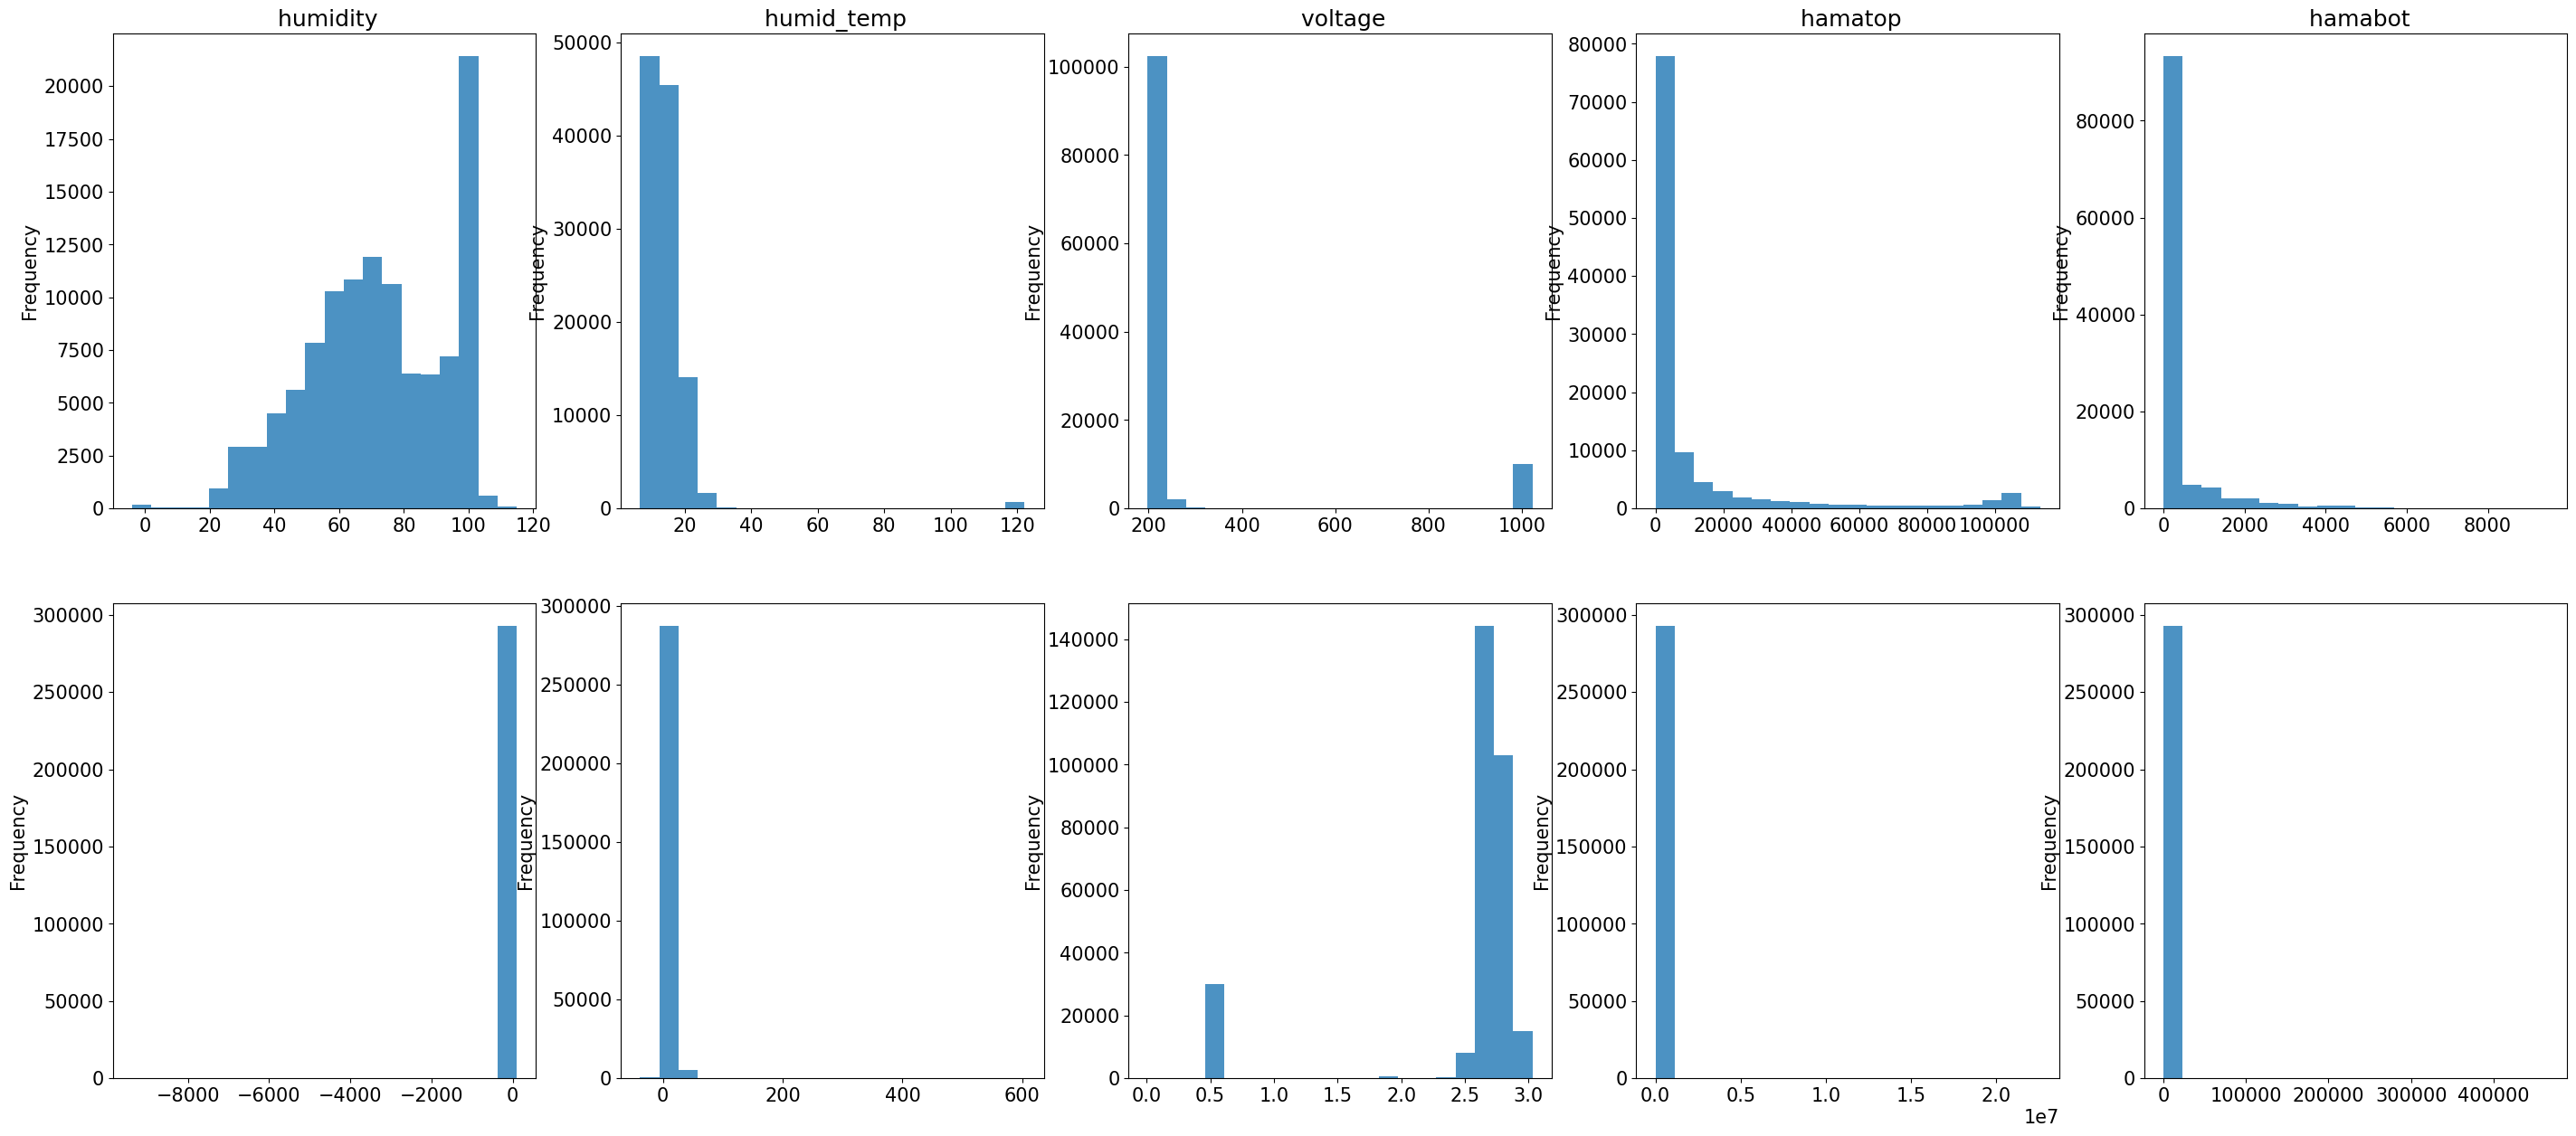

In [151]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
%matplotlib inline

variable_list = [' humidity',
                 ' humid_temp', ' voltage', ' hamatop', ' hamabot']

fig, ax = plt.subplots(2,5, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)
    

- Looking at raw histogram, we see significant differences in ranges for:
- humidity
- humid_tmep
- humid_adj

In [152]:
sonoma_net[variable_list].describe()

,humidity,humid_temp,voltage,hamatop,hamabot
count,110718.000000,110718.000000,114980.000000,110718.000000,110718.000000
mean,72.123596,14.276954,292.793190,11521.654151,271.948958
std,21.327203,9.840161,227.220706,24962.815555,805.305179
min,-4.000000,6.582000,198.000000,0.000000,0.000000
25%,57.098400,10.119800,218.000000,0.000000,0.000000
50%,72.054300,12.981400,223.000000,0.000000,0.000000
75%,92.607600,16.088000,227.000000,8436.360000,0.000000
max,114.894000,122.153000,1023.000000,113376.000000,9480.770000


In [153]:
sonoma_log[variable_list].describe()

,humidity,humid_temp,voltage,hamatop,hamabot
count,292786.000000,292786.000000,301056.000000,2.927860e+05,292786.000000
mean,61.414470,15.022345,2.506449,1.087034e+04,245.535843
std,31.069201,5.685116,0.646910,4.842214e+04,1180.337889
min,-9375.370000,-38.400000,0.009063,0.000000e+00,0.000000
25%,40.026800,10.864600,2.627960,0.000000e+00,0.000000
50%,61.582900,14.716000,2.699640,0.000000e+00,0.000000
75%,80.199700,18.812400,2.775330,6.762330e+03,0.000000
max,104.405000,603.843000,3.030200,2.259220e+07,465820.000000


- Comparing the actual statistics, we can see that the quantiles between both sets are very similar.
- Thus the difference in ranges could be due to outliers in the dataset. 
- These outliers see to be in sonoma_log which generally has more extreme values compared to sonoma_net

We find these outliers by subsetting sonoma_log based on minimums/maximums observed in sonoma_net

In [154]:
outlier_points = sonoma_log[(sonoma_log[' humidity']< -4) | (sonoma_log[' humid_temp'] > 122)]
sonoma_log_no_outlier = sonoma_log.drop(outlier_points.index)

In [155]:
outlier_points

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
62131,2004-11-10 14:25:00,2,65535,65535,0.009063,255,-9375.37,603.8430,-6334.83,116000.0,116000.0
294764,2004-11-10 14:25:00,3472,198,2058,2.329100,0,-5145.10,-8.2944,-5280.44,22592200.0,465820.0


In [156]:
sonoma_log_no_outlier[sonoma_log_no_outlier[' voltage']<2]

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
46253,2004-11-10 14:25:00,2,29,65535,1.934590,255,-4.0000,-38.4000,-4.6340,125446.00,0.000
46254,2004-11-10 14:25:00,3,29,65535,1.928310,255,-4.0000,-38.4000,-4.6340,125039.00,376.623
46255,2004-11-10 14:25:00,4,29,65535,1.940910,255,-4.0000,-38.4000,-4.6340,73163.40,0.000
46256,2004-11-10 14:25:00,5,29,65535,1.940910,255,-4.0000,-38.4000,-4.6340,128131.00,0.000
46257,2004-11-10 14:25:00,6,29,65535,1.940910,255,-4.0000,-38.4000,-4.6340,128510.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...
279267,2004-11-10 14:25:00,2598,145,110,0.580567,15,61.3119,14.5200,59.6569,2721.41,0.000
279268,2004-11-10 14:25:00,2599,145,110,0.580567,15,61.8536,14.2848,60.1460,1814.27,113.392
279269,2004-11-10 14:25:00,2600,145,110,0.580567,18,61.3119,14.0986,59.5903,2267.84,0.000
279270,2004-11-10 14:25:00,2601,145,110,0.580567,18,62.1837,13.8340,60.3945,1814.27,0.000


Redoing Histograms:

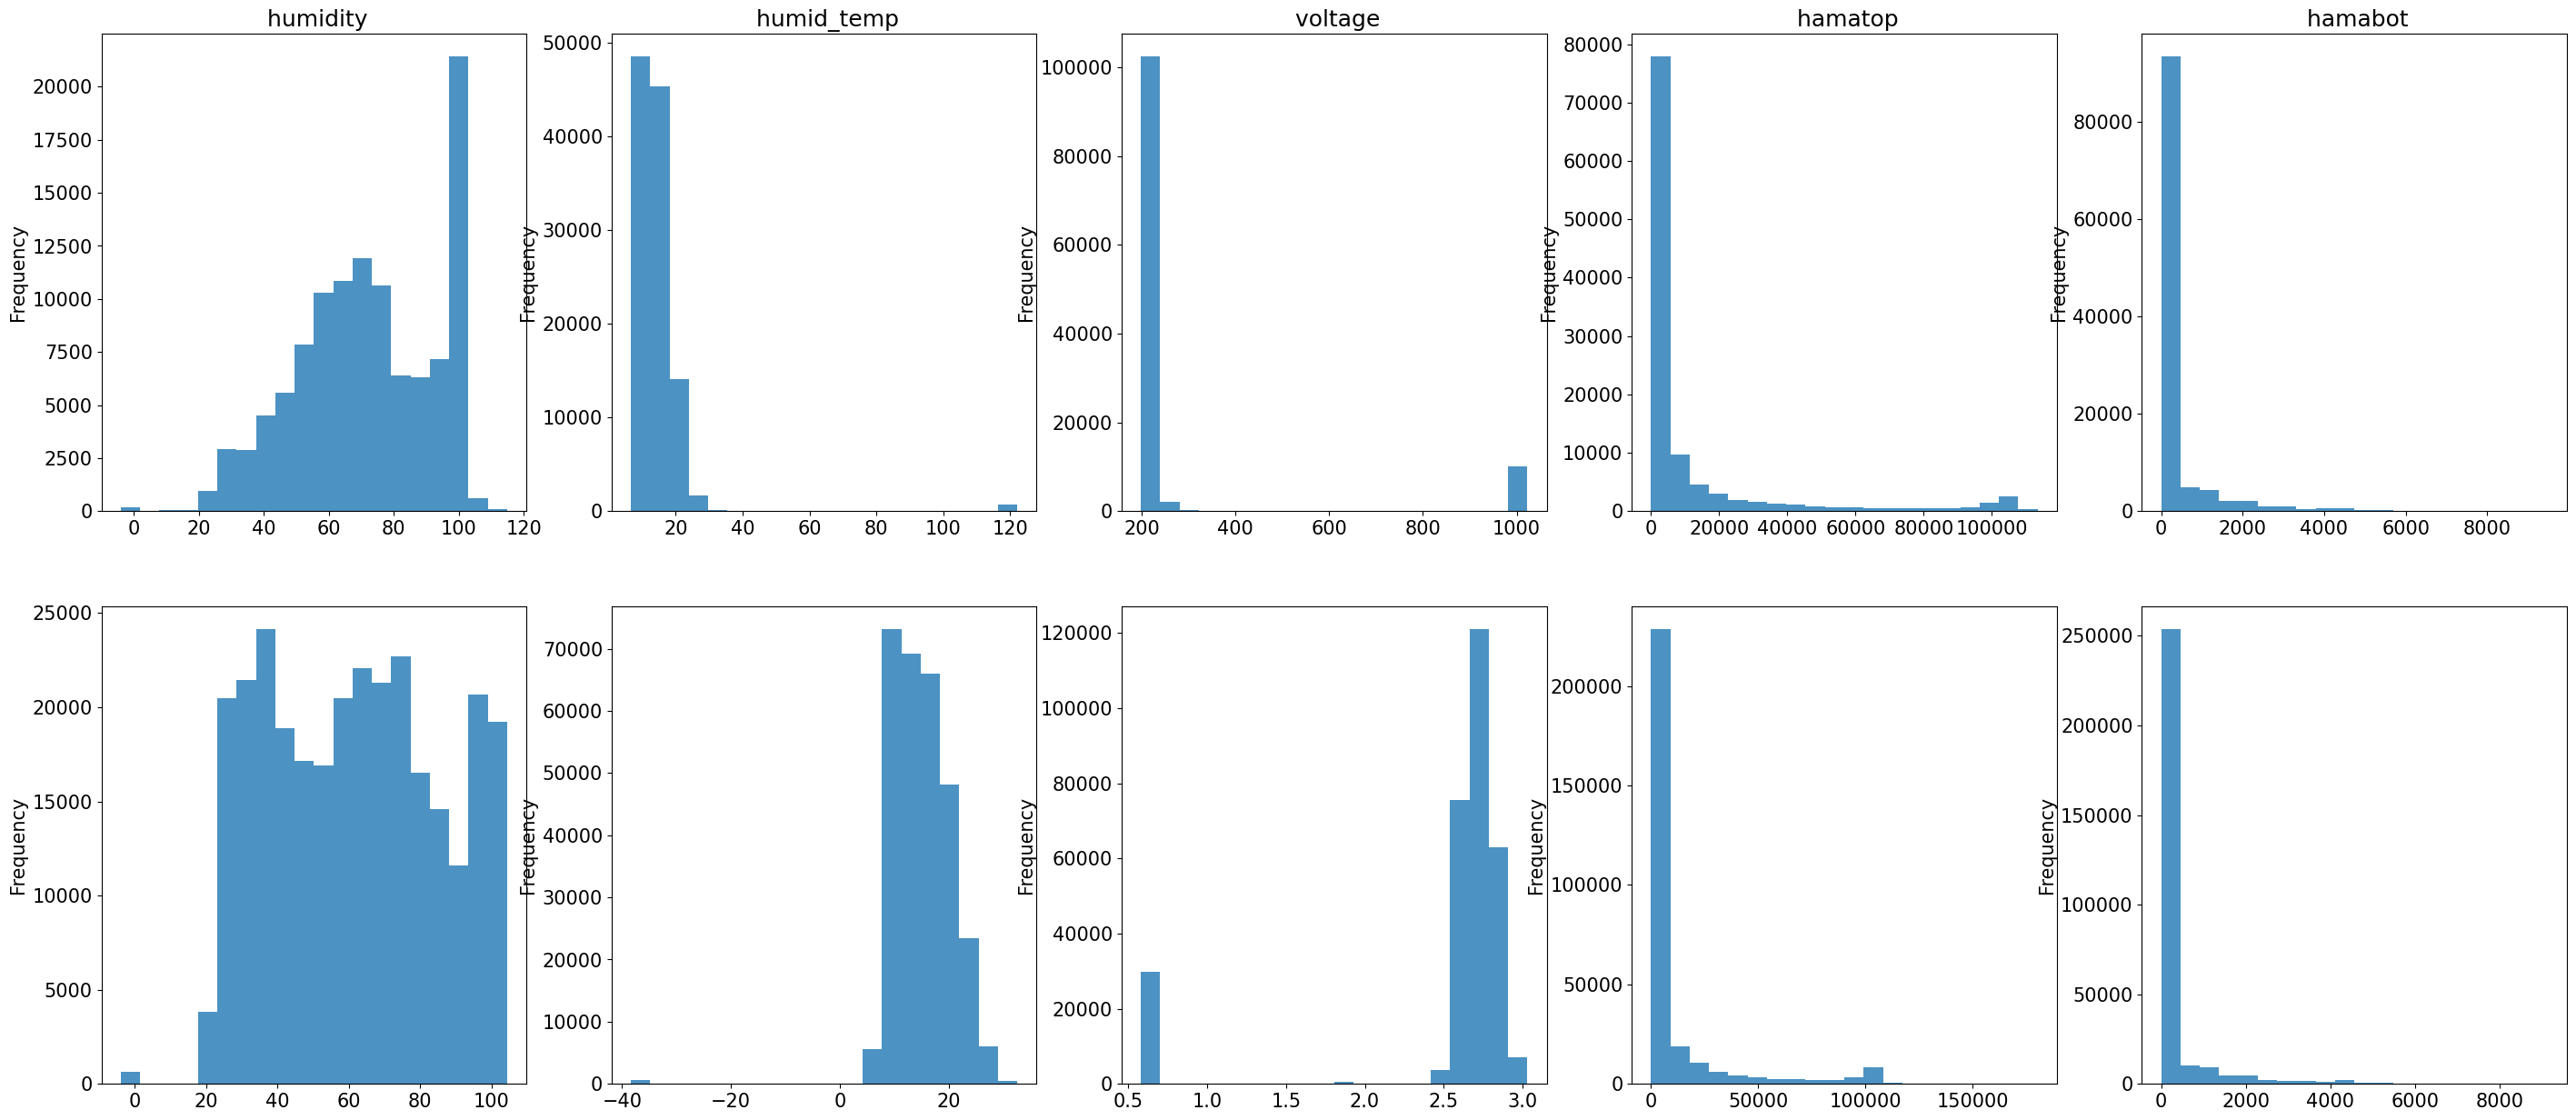

In [157]:
fig, ax = plt.subplots(2,5, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log_no_outlier[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)

We see that things looks much more similar.

In [449]:
import seaborn as sns

# Check Missing Data

In [158]:
import numpy as np
missing_data_net = sonoma_net[np.any(sonoma_net.isna(),1)]
print("No Missing Data from network data: ",len(missing_data_net))

miss_data_log = sonoma_log_no_outlier[np.any(sonoma_log_no_outlier.isna(),1)]
print("No Missing Data from log data: ",len(miss_data_log))

# Remove
sonoma_net_no_miss = sonoma_net[~np.any(sonoma_net.isna(),1)]
sonoma_log_no_miss = sonoma_log_no_outlier[~np.any(sonoma_log_no_outlier.isna(),1)]

print('\nNo. Network Data Full: ', len(sonoma_net_no_miss))
print("No. Log Data Full + no outliers: ", len(sonoma_log_no_miss))

No Missing Data from network data:  4262
No Missing Data from log data:  8270

No. Network Data Full:  110718
No. Log Data Full + no outliers:  292784


### Combine cleaner net and log data

In [159]:
sonoma_net_no_miss = sonoma_net_no_miss.copy() # To get rid of annoying warning
sonoma_log_no_miss = sonoma_log_no_miss.copy()

sonoma_net_no_miss.loc[:,'source'] = 'net'
sonoma_log_no_miss.loc[:,'source'] = 'log'

sonoma_all = pd.concat([sonoma_net_no_miss,sonoma_log_no_miss])

In [160]:
sonoma_all.sample(10).head()

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot,source
45595,2004-05-18 09:01:05.623619,5867,118,0,229.000000,1,100.0130,8.6596,95.4843,0.000,0.00,net
290649,2004-11-10 14:25:00,7482,197,0,2.801510,1,57.9620,17.3620,56.8230,35566.000,547.17,log
248749,2004-11-10 14:25:00,6500,134,5,0.580567,3,82.1383,10.7960,79.0521,226.784,0.00,log
180170,2004-11-10 14:25:00,7152,113,129,2.687420,3,72.1385,12.9716,69.8811,15221.700,5248.87,log
120162,2004-11-10 14:25:00,4492,77,197,2.687420,2,60.7078,12.8736,58.8122,0.000,0.00,log


## Part c) Adding Location data

Loading 

In [161]:
# Loads the information
mote_location = pd.read_csv('Data/mote-location-data.txt',sep='\t',skiprows=1,header=None)

# Loads the headers
mote_location_head = pd.read_csv('Data/mote-location-data.txt',sep='\t',header=0).columns

# Clean the headers
col_names_mote_location = [x for x in mote_location_head[0].split(' ') if x!='']

# Set the column names
mote_location.columns = col_names_mote_location
mote_location.head()

,ID,Height,Direc,Dist,Tree
0,24,10.5,WSW,0.1,edge
1,20,12.7,WSW,0.1,edge
2,27,14.9,WSW,0.1,edge
3,38,16.6,WSW,0.1,edge
4,0,16.9,NW,0.1,edge


In [162]:
print('Size mote-location table: ', len(mote_location))

Size mote-location table:  80


Checking if mote location is clean - ID should be a unique variable


In [163]:
np.all(mote_location['ID'].value_counts() == 1)

True

Merge tables together this is a left (main table) join  to the mote locations

In [164]:
sonoma_all = sonoma_all.merge(mote_location,
                how='left',
                left_on=' nodeid',
                right_on='ID')

## Part d) Redo Histograms and remove outliers

In [165]:
sonoma_all.columns

Index(['result_time', ' epoch', ' nodeid', ' parent', ' voltage', ' depth',
       ' humidity', ' humid_temp', ' humid_adj', ' hamatop', ' hamabot',
       'source', 'ID', 'Height', 'Direc', 'Dist', 'Tree'],
      dtype='object')

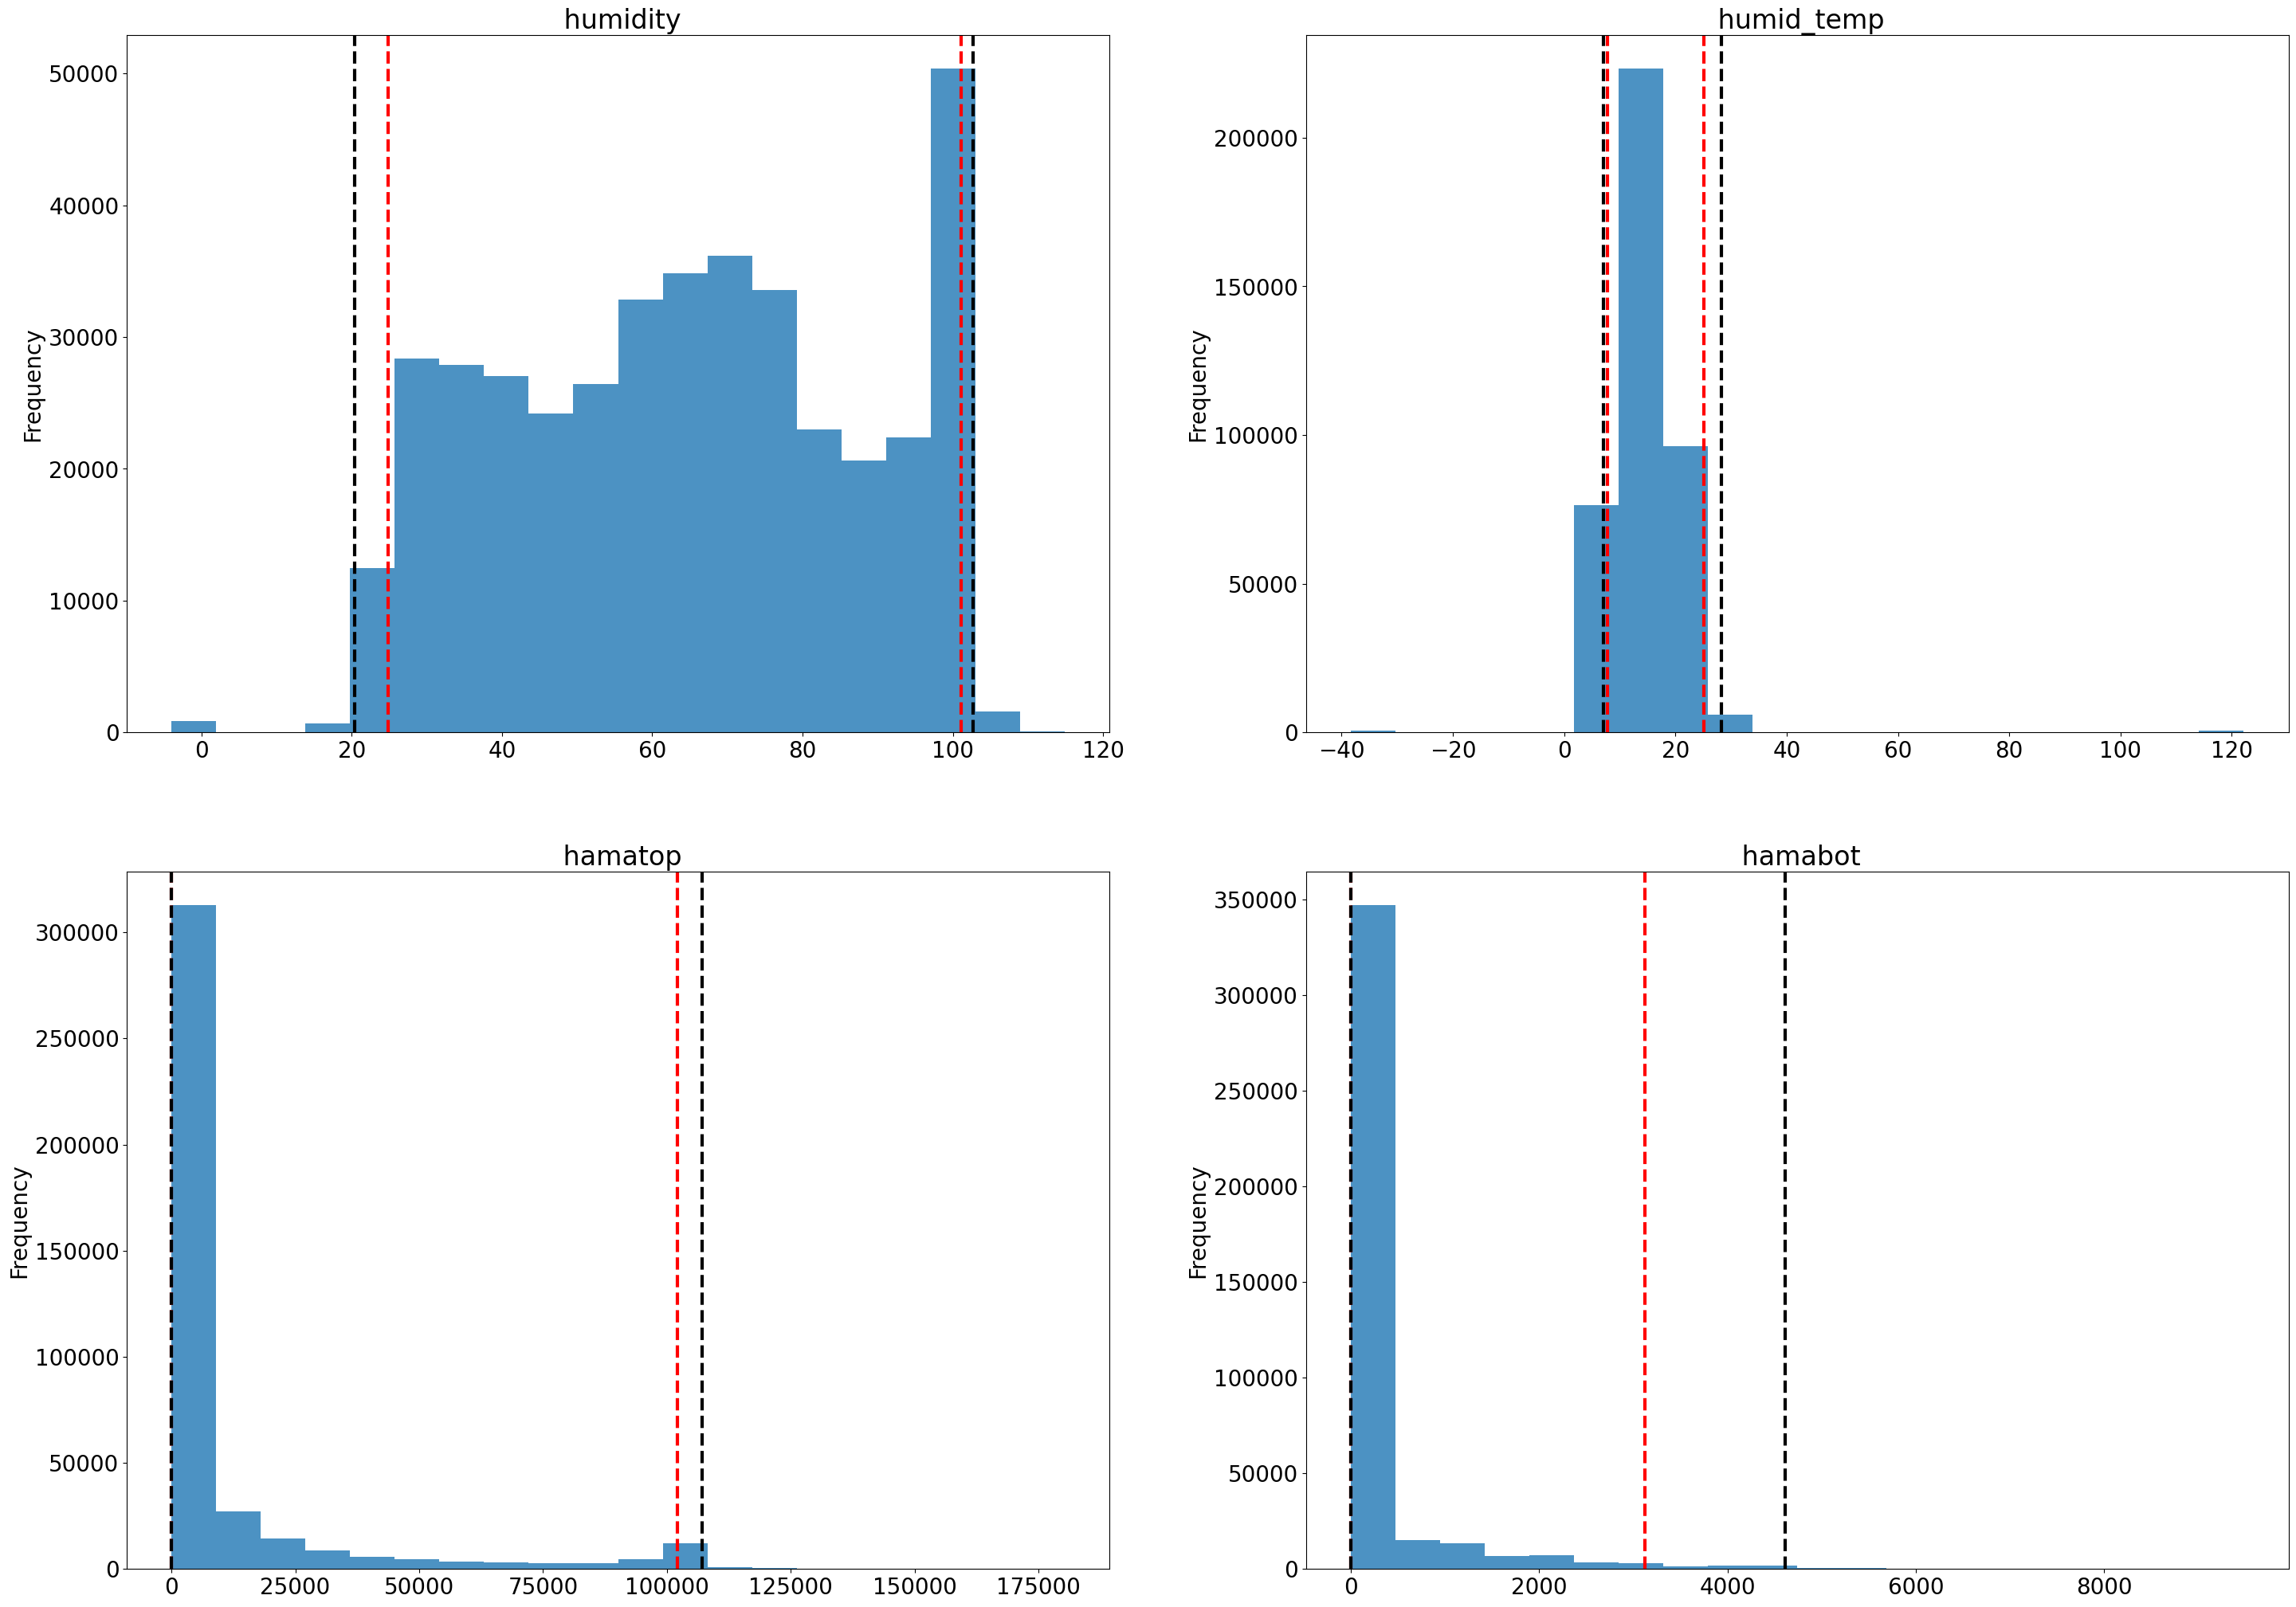

In [166]:
plt.rcParams.update({'font.size': 20})

var_list = [' humidity', ' humid_temp', ' hamatop', ' hamabot']
plot_locs = [(0,0),(0,1),(1,0),(1,1)]
fig, ax = plt.subplots(2,2, figsize=(35,25))

# Choose Percentile values
percentiles = [(5,95), (25,75)]

for i,var in enumerate(var_list):
    
    sonoma_all[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all[var].values, q=2.5),np.percentile(sonoma_all[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all[var].values, q=0.5),np.percentile(sonoma_all[var].values, q=99.5)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

- It is clear that there are outliers for hamatop and hamabot
- Humidity has values that are negative which might not be possible as well (not sure)

Removing them we have:


In [167]:
# Hamatop/bot outliers
print('No hamatop outliers: ', len(sonoma_all[sonoma_all[' hamatop']>110000]))
print('No hamabot outliers: ', len(sonoma_all[sonoma_all[' hamabot']>6000]))
# Humidity outliers
print('No humidity outliers: ', len(sonoma_all[sonoma_all[' humidity']<5]))

print('No combined outliers: ', len(sonoma_all[(sonoma_all[' hamatop']>120000) | \
                                               (sonoma_all[' hamabot']>6000) | \
                                               (sonoma_all[' humidity']<5)]))

sonoma_all_no_outliers = sonoma_all[~((sonoma_all[' hamatop']>120000) |\
                                      (sonoma_all[' hamabot']>6000) |\
                                     (sonoma_all[' humidity']<5))]

No hamatop outliers:  512
No hamabot outliers:  326
No humidity outliers:  872
No combined outliers:  1257


### Plotting Again

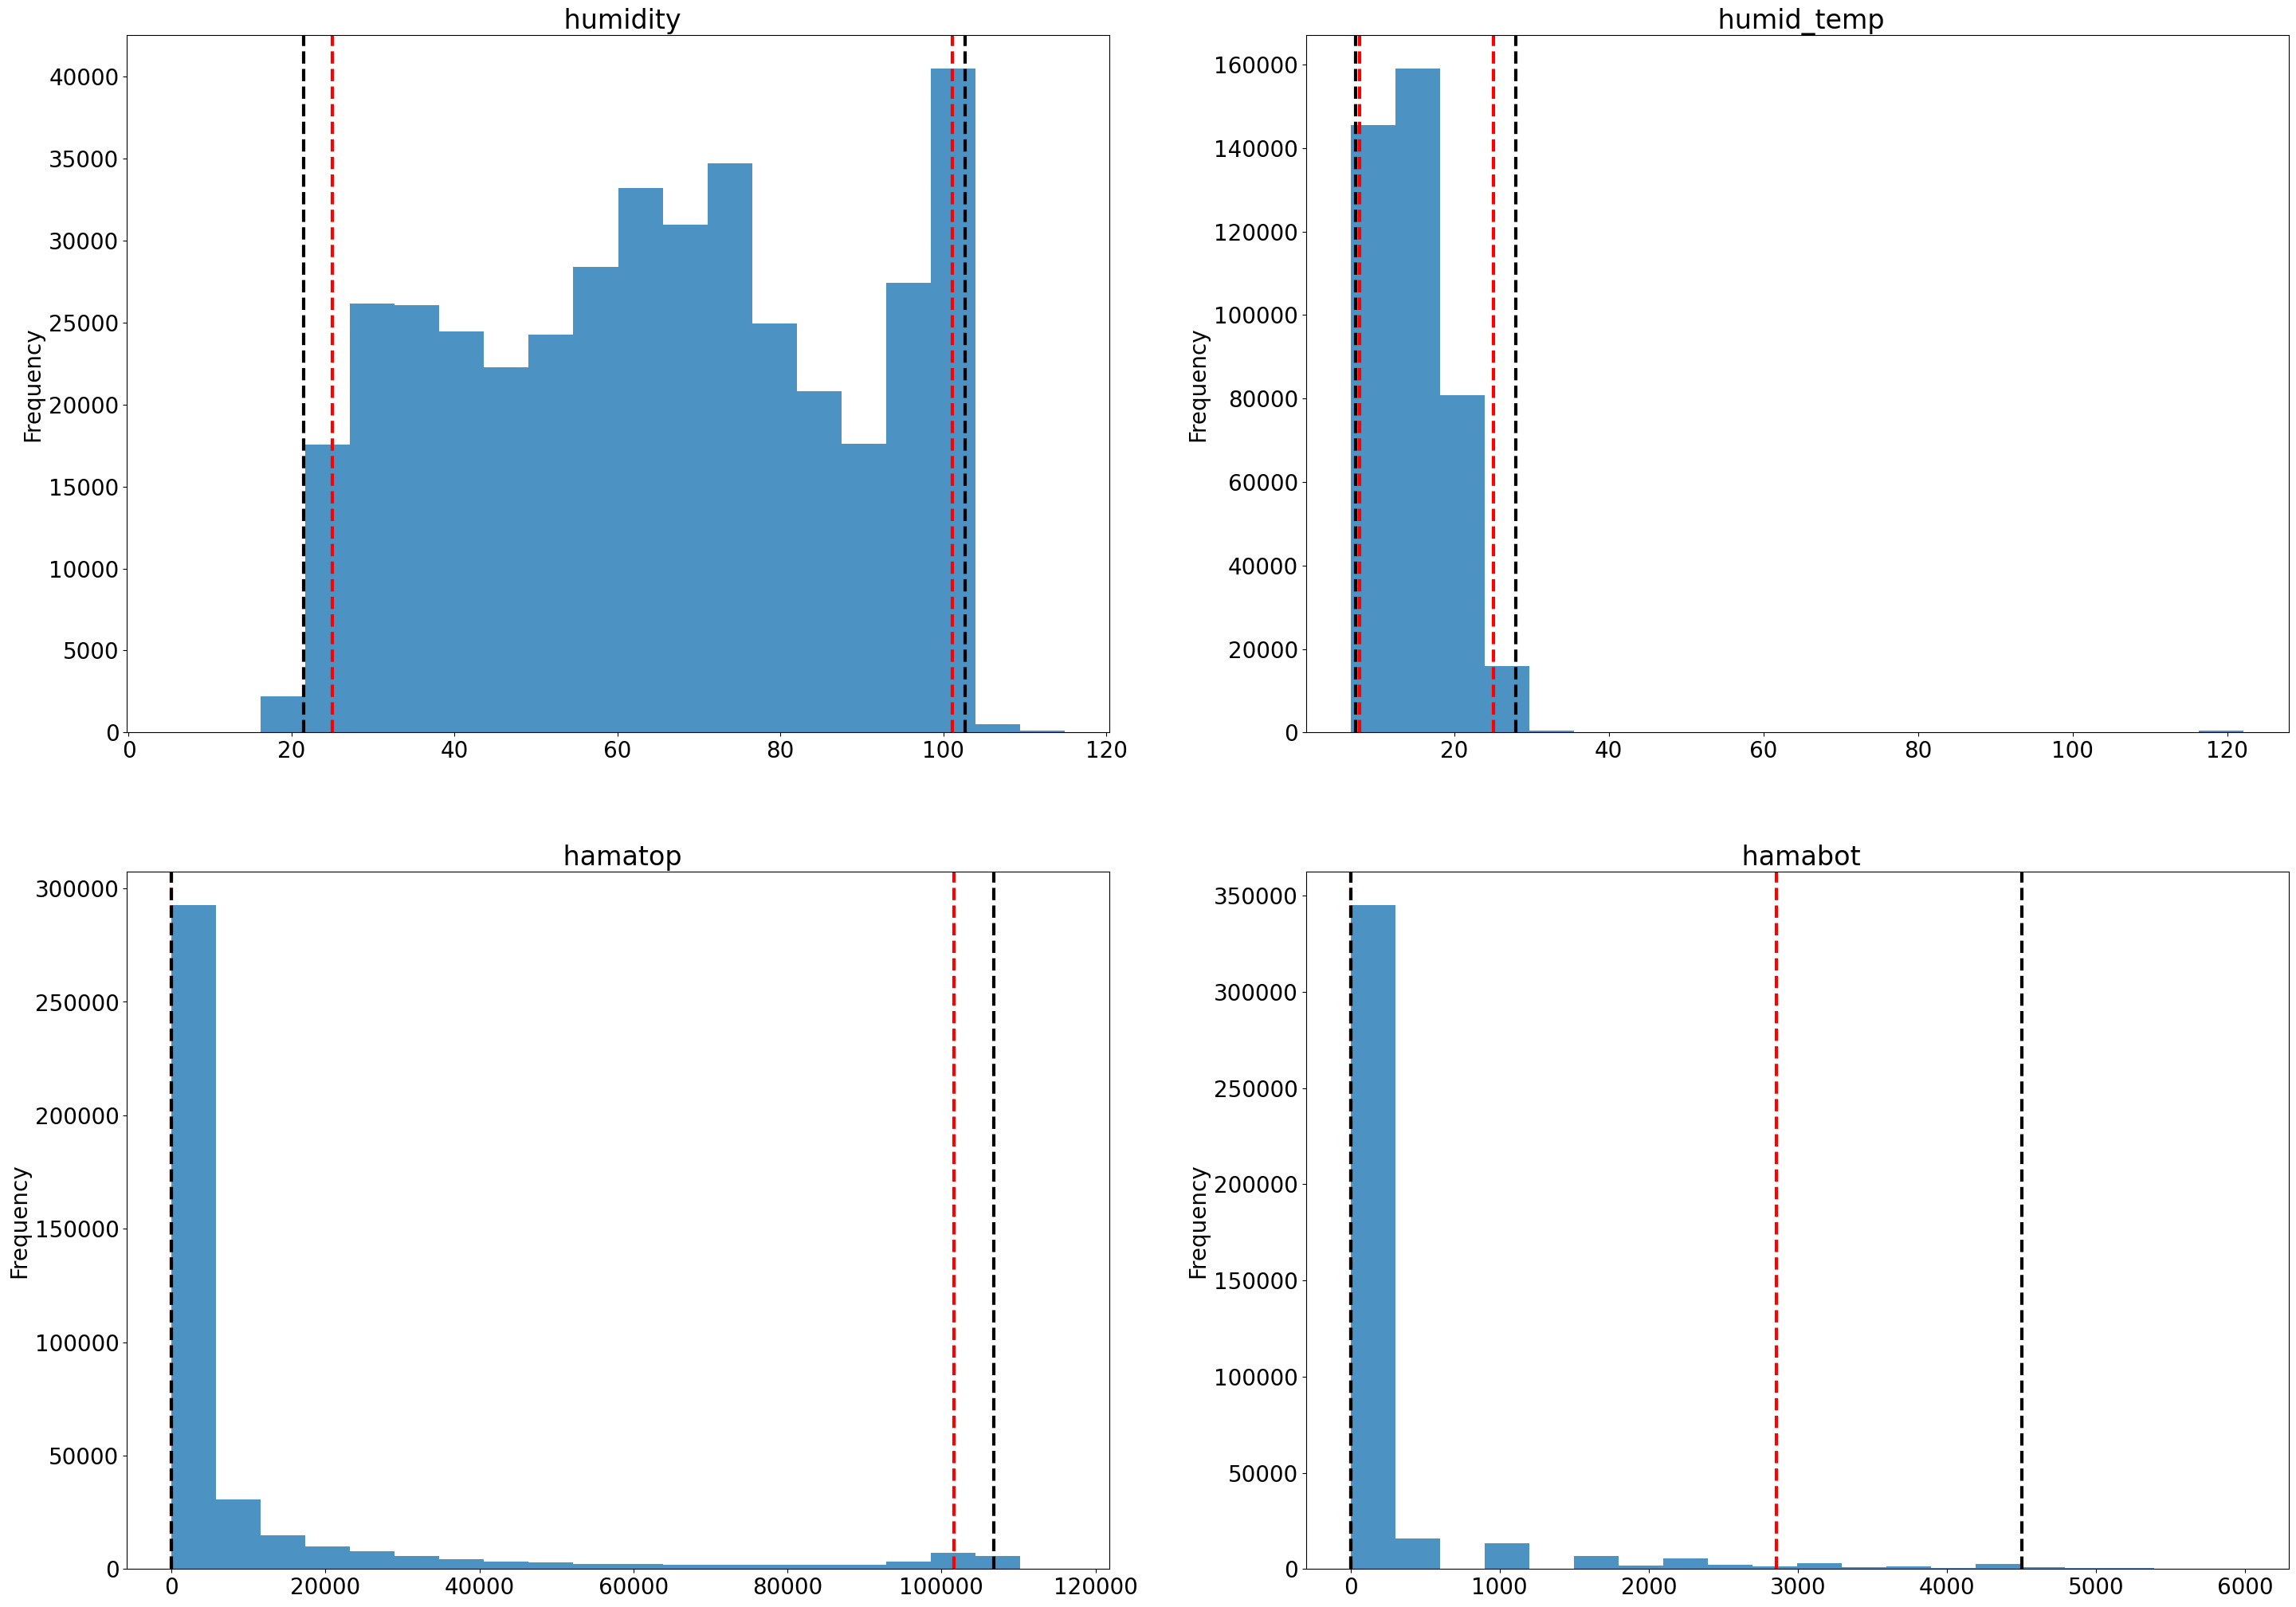

In [168]:
fig, ax = plt.subplots(2,2, figsize=(35,25))

for i,var in enumerate(var_list):
    
    sonoma_all_no_outliers[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all_no_outliers[var].values, q=2.5),np.percentile(sonoma_all_no_outliers[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all_no_outliers[var].values, q=0.5),np.percentile(sonoma_all_no_outliers[var].values, q=99.5)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

<AxesSubplot:xlabel=' hamatop', ylabel='Height'>

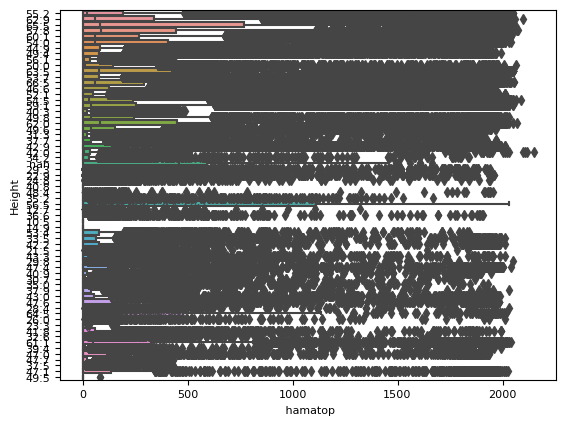

In [460]:
plt.rcParams.update({'font.size': 8})
sns.boxplot(y=sonoma_all_no_outliers['Height'].astype('str'),
          x=sonoma_all_no_outliers[' hamatop']/54)

<AxesSubplot:xlabel='Height', ylabel=' hamatop'>

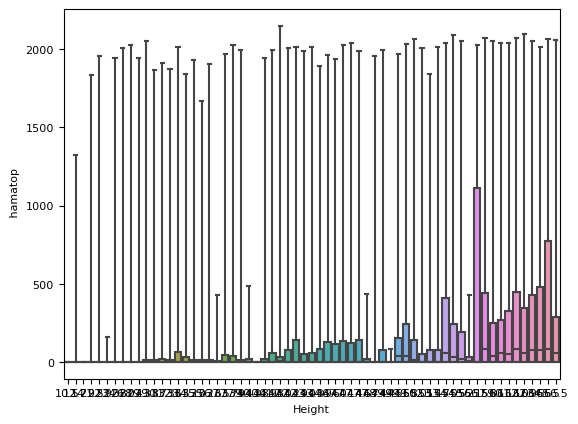

In [465]:
sns.boxplot(x=sonoma_all_no_outliers['Height'],
          y=sonoma_all_no_outliers[' hamatop']/54,
            whis=[0, 100])

<AxesSubplot:xlabel='Height', ylabel=' hamabot'>

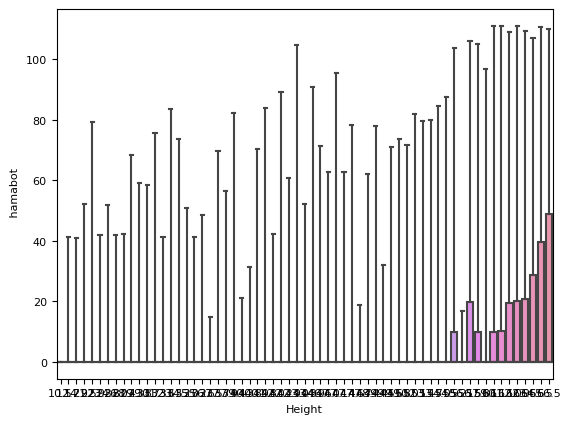

In [476]:
sns.boxplot(x=sonoma_all_no_outliers['Height'],
          y=sonoma_all_no_outliers[' hamabot']/54,
            whis=[0, 100])

In [452]:
sonoma_all_no_outliers.head()

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot,source,ID,Height,Direc,Dist,Tree,nodeid_epoch,is_log
0,2004-05-07 18:24:58.666424,2812,119,5,220.0,2,95.3567,12.6678,92.1444,4218.18,0.0,net,119.0,55.2,WSW,3.0,interior,119_2812,False
1,2004-05-07 18:24:58.805974,2812,105,129,223.0,3,96.9957,12.6482,93.7072,9363.23,0.0,net,105.0,62.9,SW,0.1,interior,105_2812,False
2,2004-05-07 18:24:59.075427,2812,113,118,222.0,4,94.5031,12.4522,91.2718,9405.41,0.0,net,113.0,65.5,SW,0.1,interior,113_2812,False
3,2004-05-07 18:24:59.355354,2812,138,5,223.0,2,96.8828,12.6580,93.6018,9363.23,0.0,net,138.0,57.8,WSW,0.1,interior,138_2812,False
4,2004-05-07 18:24:59.675467,2812,127,42,222.0,3,97.8044,12.3836,94.4090,4702.70,0.0,net,127.0,60.1,SW,0.1,interior,127_2812,False


## Part e)

- There are still some extreme values for hamatop and hamabot as well as humid_temp. However they are not obviously errorneous, so we cannot tell if they are part of the distribution.

- Due to the sensitivity of the instrument, these points might be generated by miscalibration or equipment failure, and thus will not represent the data generated by the environment around the tree. This means that they will not be useful for analysis

In [381]:
sonoma_log = sonoma_log.copy()
sonoma_net = sonoma_net.copy()
sonoma_log['source'] = 'log'
sonoma_net['source'] = 'net'

sonoma_raw = pd.concat([sonoma_net, sonoma_log])

In [274]:
sonoma_all_no_outliers.head()

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot,source,ID,Height,Direc,Dist,Tree,nodeid_epoch
0,2004-05-07 18:24:58.666424,2812,119,5,220.0,2,95.3567,12.6678,92.1444,4218.18,0.0,net,119.0,55.2,WSW,3.0,interior,119_2812
1,2004-05-07 18:24:58.805974,2812,105,129,223.0,3,96.9957,12.6482,93.7072,9363.23,0.0,net,105.0,62.9,SW,0.1,interior,105_2812
2,2004-05-07 18:24:59.075427,2812,113,118,222.0,4,94.5031,12.4522,91.2718,9405.41,0.0,net,113.0,65.5,SW,0.1,interior,113_2812
3,2004-05-07 18:24:59.355354,2812,138,5,223.0,2,96.8828,12.6580,93.6018,9363.23,0.0,net,138.0,57.8,WSW,0.1,interior,138_2812
4,2004-05-07 18:24:59.675467,2812,127,42,222.0,3,97.8044,12.3836,94.4090,4702.70,0.0,net,127.0,60.1,SW,0.1,interior,127_2812


In [275]:
sonoma_all_no_outliers.columns

Index(['result_time', ' epoch', ' nodeid', ' parent', ' voltage', ' depth',
       ' humidity', ' humid_temp', ' humid_adj', ' hamatop', ' hamabot',
       'source', 'ID', 'Height', 'Direc', 'Dist', 'Tree', 'nodeid_epoch'],
      dtype='object')

In [386]:
node_epoch_counts = sonoma_raw[[' nodeid', ' epoch',
                        ' humidity']].groupby([' nodeid', ' epoch'],
                                             as_index=False).count()
print(len(node_epoch_counts))
node_epoch_counts_duplicates = node_epoch_counts[node_epoch_counts[' humidity']>1]
print(len(node_epoch_counts_duplicates))

319031
78821


In [387]:
node_epoch_counts_duplicates = node_epoch_counts_duplicates.copy()
node_epoch_counts_duplicates['nodeid_epoch'] = node_epoch_counts_duplicates[' nodeid'].astype('str') + '_' +\
                                                node_epoch_counts_duplicates[' epoch'].astype('str')

In [388]:
sonoma_raw=sonoma_all_no_outliers.copy()
sonoma_raw['nodeid_epoch'] = sonoma_raw[' nodeid'].astype('str') + '_' +\
                                                sonoma_raw[' epoch'].astype('str')

sonoma_raw['is_log'] = sonoma_raw['source'] == 'log'

In [389]:
duplicate_info = sonoma_all_no_outliers[
    sonoma_raw['nodeid_epoch'].isin(list(node_epoch_counts_duplicates[
        'nodeid_epoch'].values))]

In [390]:
duplicate_info.head()

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot,source,ID,Height,Direc,Dist,Tree,nodeid_epoch,is_log
0,2004-05-07 18:24:58.666424,2812,119,5,220.0,2,95.3567,12.6678,92.1444,4218.18,0.0,net,119.0,55.2,WSW,3.0,interior,119_2812,False
1,2004-05-07 18:24:58.805974,2812,105,129,223.0,3,96.9957,12.6482,93.7072,9363.23,0.0,net,105.0,62.9,SW,0.1,interior,105_2812,False
2,2004-05-07 18:24:59.075427,2812,113,118,222.0,4,94.5031,12.4522,91.2718,9405.41,0.0,net,113.0,65.5,SW,0.1,interior,113_2812,False
4,2004-05-07 18:24:59.675467,2812,127,42,222.0,3,97.8044,12.3836,94.4090,4702.70,0.0,net,127.0,60.1,SW,0.1,interior,127_2812,False
5,2004-05-07 18:29:58.713125,2813,74,5,220.0,2,96.0659,12.9030,92.8849,7909.09,0.0,net,74.0,54.0,NE,3.0,interior,74_2813,False


In [391]:
def has_mix_net_log(in_col):
    if len(in_col.unique()) > 1:
        return True
    else:
        return False

def all_same(in_col):
    
    if len(in_col.unique()) > 1:
        return False
    else:
        return True
    

In [423]:
dupls[' humidity'].std()

0.023758787847867894

In [424]:
voltage_store = []
no_unqiue_list = []
total_len = []

same_humid = []
same_temp = []
same_hamatop = []
same_hamabot = []

std_humid = []
std_temp = []
std_hamatop = []
std_hamabot = []

i = 0
for nid_ep in duplicate_info['nodeid_epoch'].unique():
    dupls = duplicate_info[duplicate_info['nodeid_epoch']==nid_ep]
    total_len.append(len(dupls))
    
    # Get log voltage
    if len(dupls[dupls['source']=='log'][' voltage'].values) > 0:
        log_voltage = dupls[dupls['source']=='log'][' voltage'].values[0]
    else:
        log_voltage = np.nan
    
    if len(dupls[dupls['source']=='net'][' voltage'].values) > 0:
        net_voltage = dupls[dupls['source']=='net'][' voltage'].values[0]
    else:
        net_voltage = np.nan
    
    
    # Check values
    no_unqiue_list.append(len(dupls['source'].unique()))
    
    # All same
    same_humid.append(len(dupls[' humidity'].unique()))
    std_humid.append(dupls[' humidity'].std())
    
    same_temp.append(len(dupls[' humid_temp'].unique()))
    std_temp.append(dupls[' humid_temp'].std())
    
    same_hamatop.append(len(dupls[' hamatop'].unique()))
    std_hamatop.append(dupls[' hamatop'].std())
    
    same_hamabot.append(len(dupls[' hamabot'].unique()))
    std_hamabot.append(dupls[' hamabot'].std())
    
    voltage_store.append((nid_ep, log_voltage, net_voltage))
    
    if i%10000 == 0:
        print(i)
    
    #if i == 10000:
    #    break
    i+=1

0
10000
20000
30000
40000
50000
60000
70000


In [425]:
log_net_volt_pairs = [x for x in voltage_store if np.nan not in x]

log_volts = [x[1] for x in voltage_store]
net_volts = [x[2] for x in voltage_store]

dupl_infos = pd.DataFrame([duplicate_info['nodeid_epoch'].unique(),
                         log_volts,
                         net_volts,
                         total_len,
                          no_unqiue_list,
                         same_humid,
                        same_temp,
                        same_hamatop,
                        same_hamabot,
                        std_humid,
                           std_temp,
                        std_hamatop,
                          std_hamabot]).T

dupl_infos.columns = ['nodeid_epoch',
                      'log_volt',
                      'net_volt',
                      'total_duplicates',
                      'no_unique_sources',
                      'no_unique_humid',
                      'no_unique_temp',
                      'no_unique_hamatop',
                      'no_unique_hamabot',
                     'std_humid',
                      'std_temp',
                      'std_hamatop',
                      'std_hamabot']

In [437]:
dupl_infos.sort_values('std_hamabot',ascending=False).head(20)

,nodeid_epoch,log_volt,net_volt,total_duplicates,no_unique_sources,no_unique_humid,no_unique_temp,no_unique_hamatop,no_unique_hamabot,std_humid,std_temp,std_hamatop,std_hamabot
74623,55_33,2.91137,NaN,2,1,2,2,1,2,0.023335,0.00693,0.0,1990.880356
74629,62_36,2.85538,NaN,2,1,2,2,1,2,0.615254,0.242538,0.0,1577.392594
78716,200_36,2.95483,NaN,2,1,1,2,1,2,0.0,0.00693,0.0,1218.182349
74638,73_33,2.92571,NaN,2,1,1,1,1,2,0.0,0.0,0.0,1212.186084
78693,111_36,2.92571,NaN,2,1,1,2,1,2,0.0,0.013859,0.0,1212.186084
71789,74_9441,NaN,203.0,2,1,1,2,2,2,0.0,5.321968,67074.027943,1212.17972
74641,73_301,2.91137,NaN,2,1,1,1,1,2,0.0,0.0,0.0,1206.239316
74642,76_33,2.88311,NaN,2,1,1,2,1,2,0.0,0.00693,0.0,1206.239316
78705,140_36,2.91137,NaN,2,1,2,1,1,2,0.023829,0.0,0.0,1206.239316
51260,4_7074,2.60491,228.0,3,2,2,2,1,2,0.012124,0.011316,0.0,1174.959759


(150.0, 300.0)

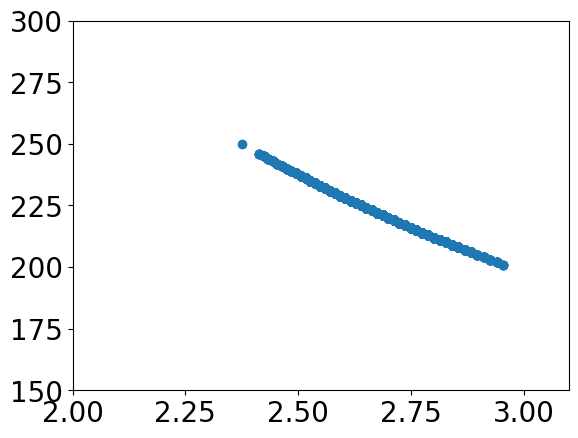

In [432]:
plt.scatter(log_volts, net_volts)
plt.xlim(2, 3.1)
plt.ylim(150,300)

## Finding 1

- Cluster time points by day or by hour to find similar times in a time interval (24hr / week/ month).
- Each time point collapsed (40*4) vector 
- Use 1 day and use all days (but only hours)

## Finding 2

- Mean (taken across time) for each feature and node.
- Produces a data frame of nodeid x [humid, humid_temp,...] can throw in the height into this 
- PCA
- Or Day x Variable as index with hour mean as columns 
- Or time x Variables

In [484]:
epoch_data.head()

,Epoch_No,Epoch_Days,Epoch_datetime
0,1,12536.006944,2004-04-27 17:10:00
1,2,12536.010417,2004-04-27 17:15:00
2,3,12536.013889,2004-04-27 17:20:00
3,4,12536.017361,2004-04-27 17:25:00
4,5,12536.020833,2004-04-27 17:30:00


In [487]:
epoch_data.head()

,Epoch_No,Epoch_Days,Epoch_datetime
0,1,12536.006944,2004-04-27 17:10:00
1,2,12536.010417,2004-04-27 17:15:00
2,3,12536.013889,2004-04-27 17:20:00
3,4,12536.017361,2004-04-27 17:25:00
4,5,12536.020833,2004-04-27 17:30:00


In [491]:
sonoma_all_no_outliers_analysis = sonoma_all_no_outliers.merge(epoch_data,
                                                               left_on=' epoch',
                                                               right_on='Epoch_No',
                                                               how='left')


In [493]:
sonoma_all_no_outliers_analysis['Incident_PAR'] = sonoma_all_no_outliers_analysis[' hamatop']/54
sonoma_all_no_outliers_analysis['Reflected_PAR'] = sonoma_all_no_outliers_analysis[' hamabot']/54


In [495]:
sonoma_all_no_outliers_analysis.to_csv('sonoma_data_clean.csv',index=False)